In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs

# Prepare train/test data

In [13]:
  centers = [[1, 1], [-1, -1], [1, -1]]
train_x, train_y = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
test_x, test_y = make_blobs(n_samples=250, centers=centers, cluster_std=0.4, random_state=0)
train_x = StandardScaler().fit_transform(train_x)
test_x = StandardScaler().fit_transform(test_x)

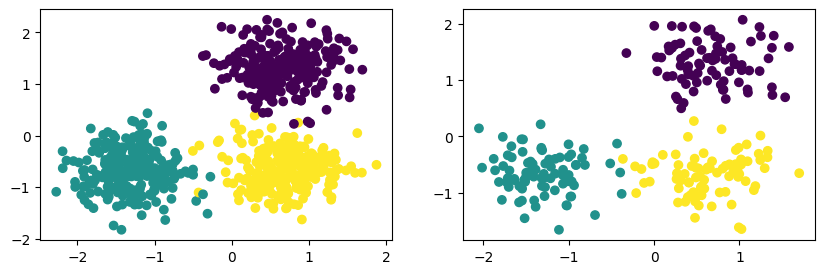

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].scatter(train_x[:, 0], train_x[:, 1], c=train_y)
axs[1].scatter(test_x[:, 0], test_x[:, 1], c=test_y)


# Perform clustering on training data

In [15]:
import numpy as np
import scipy

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(train_x)
train_preds = db.labels_

n_clusters_ = len(set(train_preds)) - (1 if -1 in train_preds else 0)
n_noise_ = list(train_preds).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


In [16]:
unique_labels = set(train_preds)
core_samples_mask = np.zeros_like(train_preds, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]


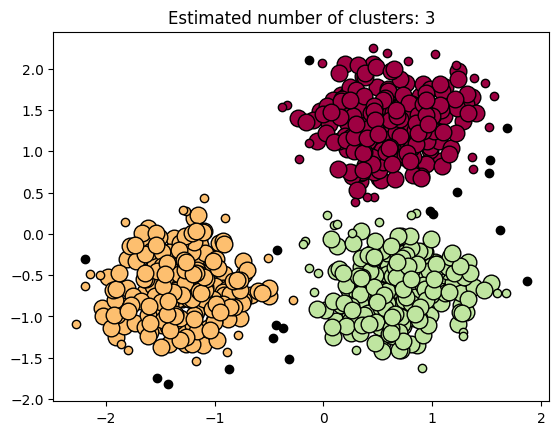

In [17]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = train_preds == k

    xy = train_x[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=12,
    )

    xy = train_x[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()


# Perform clustering on test data

In [18]:
def dbscan_predict(dbscan, test_x, metric=scipy.spatial.distance.euclidean):
    test_preds = np.ones(shape=len(test_x), dtype=int)*-1 
    for j, x in enumerate(test_x):
        for i, x_core in enumerate(dbscan.components_): 
            if metric(x, x_core) < dbscan.eps:
                test_preds[j] = dbscan.labels_[dbscan.core_sample_indices_[i]]
                break
    return test_preds

test_preds = dbscan_predict(db, test_x)

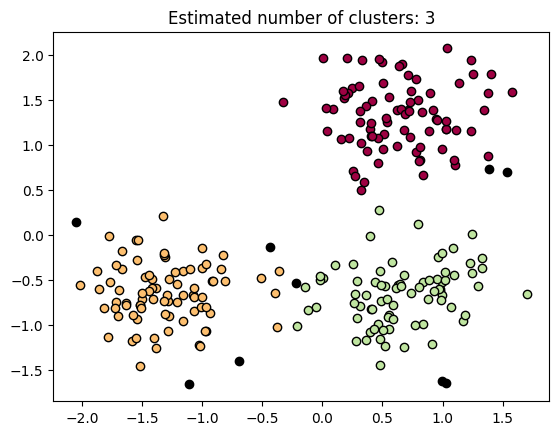

In [30]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = test_preds == k

    xy = test_x[class_member_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()
